In [1]:
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict 
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI


In [8]:
load_dotenv()

google_api_key = os.getenv("GOOGLE_API_KEY")

# Initialize Google's Gemini model with LangChain
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # Specify the Gemini model
    google_api_key=google_api_key,
    temperature=0.7
)

In [9]:
class LLMState(TypedDict):
    question: str
    answer: str
    

In [10]:
def generate_answer(state: LLMState):
    response = model.invoke(state["question"])
    answer = response.content.strip() 
    state["answer"] = answer
    return state

In [11]:
state_graph = StateGraph(LLMState) 

# node to generate answer from question 
state_graph.add_node("Generate Answer", generate_answer)

# edges 
state_graph.add_edge(START, "Generate Answer")
state_graph.add_edge("Generate Answer", END)

# compile workflow 
workflow = state_graph.compile() 


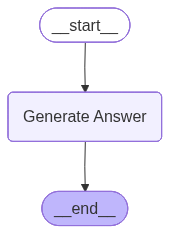

In [12]:
workflow

In [14]:
input_state = {
    "question": "how far is moon from earth?"
}

returned_state = workflow.invoke(input_state)
returned_state

{'question': 'how far is moon from earth?',
 'answer': 'The distance between the Earth and the Moon is not constant, as the Moon orbits Earth in an elliptical path. However, we can give you the average distance and the range:\n\n*   **Average Distance:** Approximately **384,400 kilometers (km)** or about **238,900 miles (mi)**.\n\n*   **Closest Point (Perigee):** Around **363,100 km (225,600 mi)**.\n*   **Farthest Point (Apogee):** Around **405,700 km (252,000 mi)**.\n\nTo put it in perspective, light takes about 1.28 seconds to travel from the Moon to the Earth.'}